# Extract, Load, Filter

In [1]:
import pandas as pd
import zipfile
import pandas as pd
from sklearn.impute import SimpleImputer
from scipy import stats
import numpy as np

### Extract ###

# Define path to the zip file
zip_path = 'fr.openfoodfacts.org.products.csv.zip'

# Define path to the csv file you want to extract
csv_path = 'fr.openfoodfacts.org.products.csv'

unzip = False

# Open and extract the csv file
if unzip:
    with zipfile.ZipFile(zip_path, 'r') as zfile:
        zfile.extract(csv_path)

### Load ###

# Now we can read the extracted csv file into a DataFrame
df = pd.read_csv(csv_path, delimiter="\t", low_memory=False)

### Filter ###

# Drop 100% missing values
df.dropna(how="all", axis="columns", inplace=True)

for col in df.columns.to_list():

    # assuming df is your DataFrame and 'column1' is your column
    missing_values_count = df[col].isnull().sum()
    total_values = len(df[col])

    if missing_values_count / total_values > 0.5:
        print(f"More than 50% of the values in {col} are missing.")
        df.drop(col, axis="columns", inplace=True)

    else:
        print(f"Less than or equal to 50% of the values in {col} are missing.")

Less than or equal to 50% of the values in code are missing.
Less than or equal to 50% of the values in url are missing.
Less than or equal to 50% of the values in creator are missing.
Less than or equal to 50% of the values in created_t are missing.
Less than or equal to 50% of the values in created_datetime are missing.
Less than or equal to 50% of the values in last_modified_t are missing.
Less than or equal to 50% of the values in last_modified_datetime are missing.
Less than or equal to 50% of the values in product_name are missing.
More than 50% of the values in generic_name are missing.
More than 50% of the values in quantity are missing.
More than 50% of the values in packaging are missing.
More than 50% of the values in packaging_tags are missing.
Less than or equal to 50% of the values in brands are missing.
Less than or equal to 50% of the values in brands_tags are missing.
More than 50% of the values in categories are missing.
More than 50% of the values in categories_tags 

# Impute Missing Values & Replace Extreme Values

In [2]:
# define relevant variables
variables = df.columns.to_list()
int_cols = df.select_dtypes(include=[int]).columns.tolist()
float_cols = df.select_dtypes(include=[float]).columns.tolist()

ignore_cols = ["nutrition-score-fr_100g",  "nutrition-score-uk_100g", 
               "additives_n", "ingredients_from_palm_oil_n",
               "ingredients_that_may_be_from_palm_oil_n"]

# create an imputer object for numeric and categorical columns
numeric_imputer = SimpleImputer(strategy='median') # Median to acccount for the fact outliers are within data
categorical_imputer = SimpleImputer(strategy='most_frequent') # Most frequent because quick and easy

missing_value_threshold = 0.5
upper_limit = 0.75
lower_limit = 0.25
factor = 1.5

for column in variables:
    missing_values_count = df[column].isnull().sum()
    total_values = len(df[column])
    if missing_values_count / total_values <= missing_value_threshold:
        print(f"More than 50% of the values in '{column}' are missing.")
        if (column in int_cols) or (column in float_cols):
            df[column] = numeric_imputer.fit_transform(df[column].values.reshape(-1, 1))

            if (column in float_cols) & (column not in ignore_cols):
                Q1 = df[column].quantile(lower_limit)
                Q3 = df[column].quantile(upper_limit)
                IQR = Q3 - Q1
                lower_fence = Q1 - (factor*IQR)
                upper_fence = Q3 + (factor*IQR)
                df[column].clip(upper=upper_fence, lower=lower_fence, inplace=True)
        else:
            df[column] = categorical_imputer.fit_transform(df[column].values.reshape(-1, 1))
    else:
        print(f"Less than or equal to 50% of the values in '{column}' are missing.")
        df.drop(col, axis="columns", inplace=True)


More than 50% of the values in 'code' are missing.
More than 50% of the values in 'url' are missing.
More than 50% of the values in 'creator' are missing.
More than 50% of the values in 'created_t' are missing.
More than 50% of the values in 'created_datetime' are missing.
More than 50% of the values in 'last_modified_t' are missing.
More than 50% of the values in 'last_modified_datetime' are missing.
More than 50% of the values in 'product_name' are missing.
More than 50% of the values in 'brands' are missing.
More than 50% of the values in 'brands_tags' are missing.
More than 50% of the values in 'countries' are missing.
More than 50% of the values in 'countries_tags' are missing.
More than 50% of the values in 'countries_fr' are missing.
More than 50% of the values in 'ingredients_text' are missing.
More than 50% of the values in 'serving_size' are missing.
More than 50% of the values in 'additives_n' are missing.
More than 50% of the values in 'additives' are missing.
More than 50%

# Univariate Analaysis

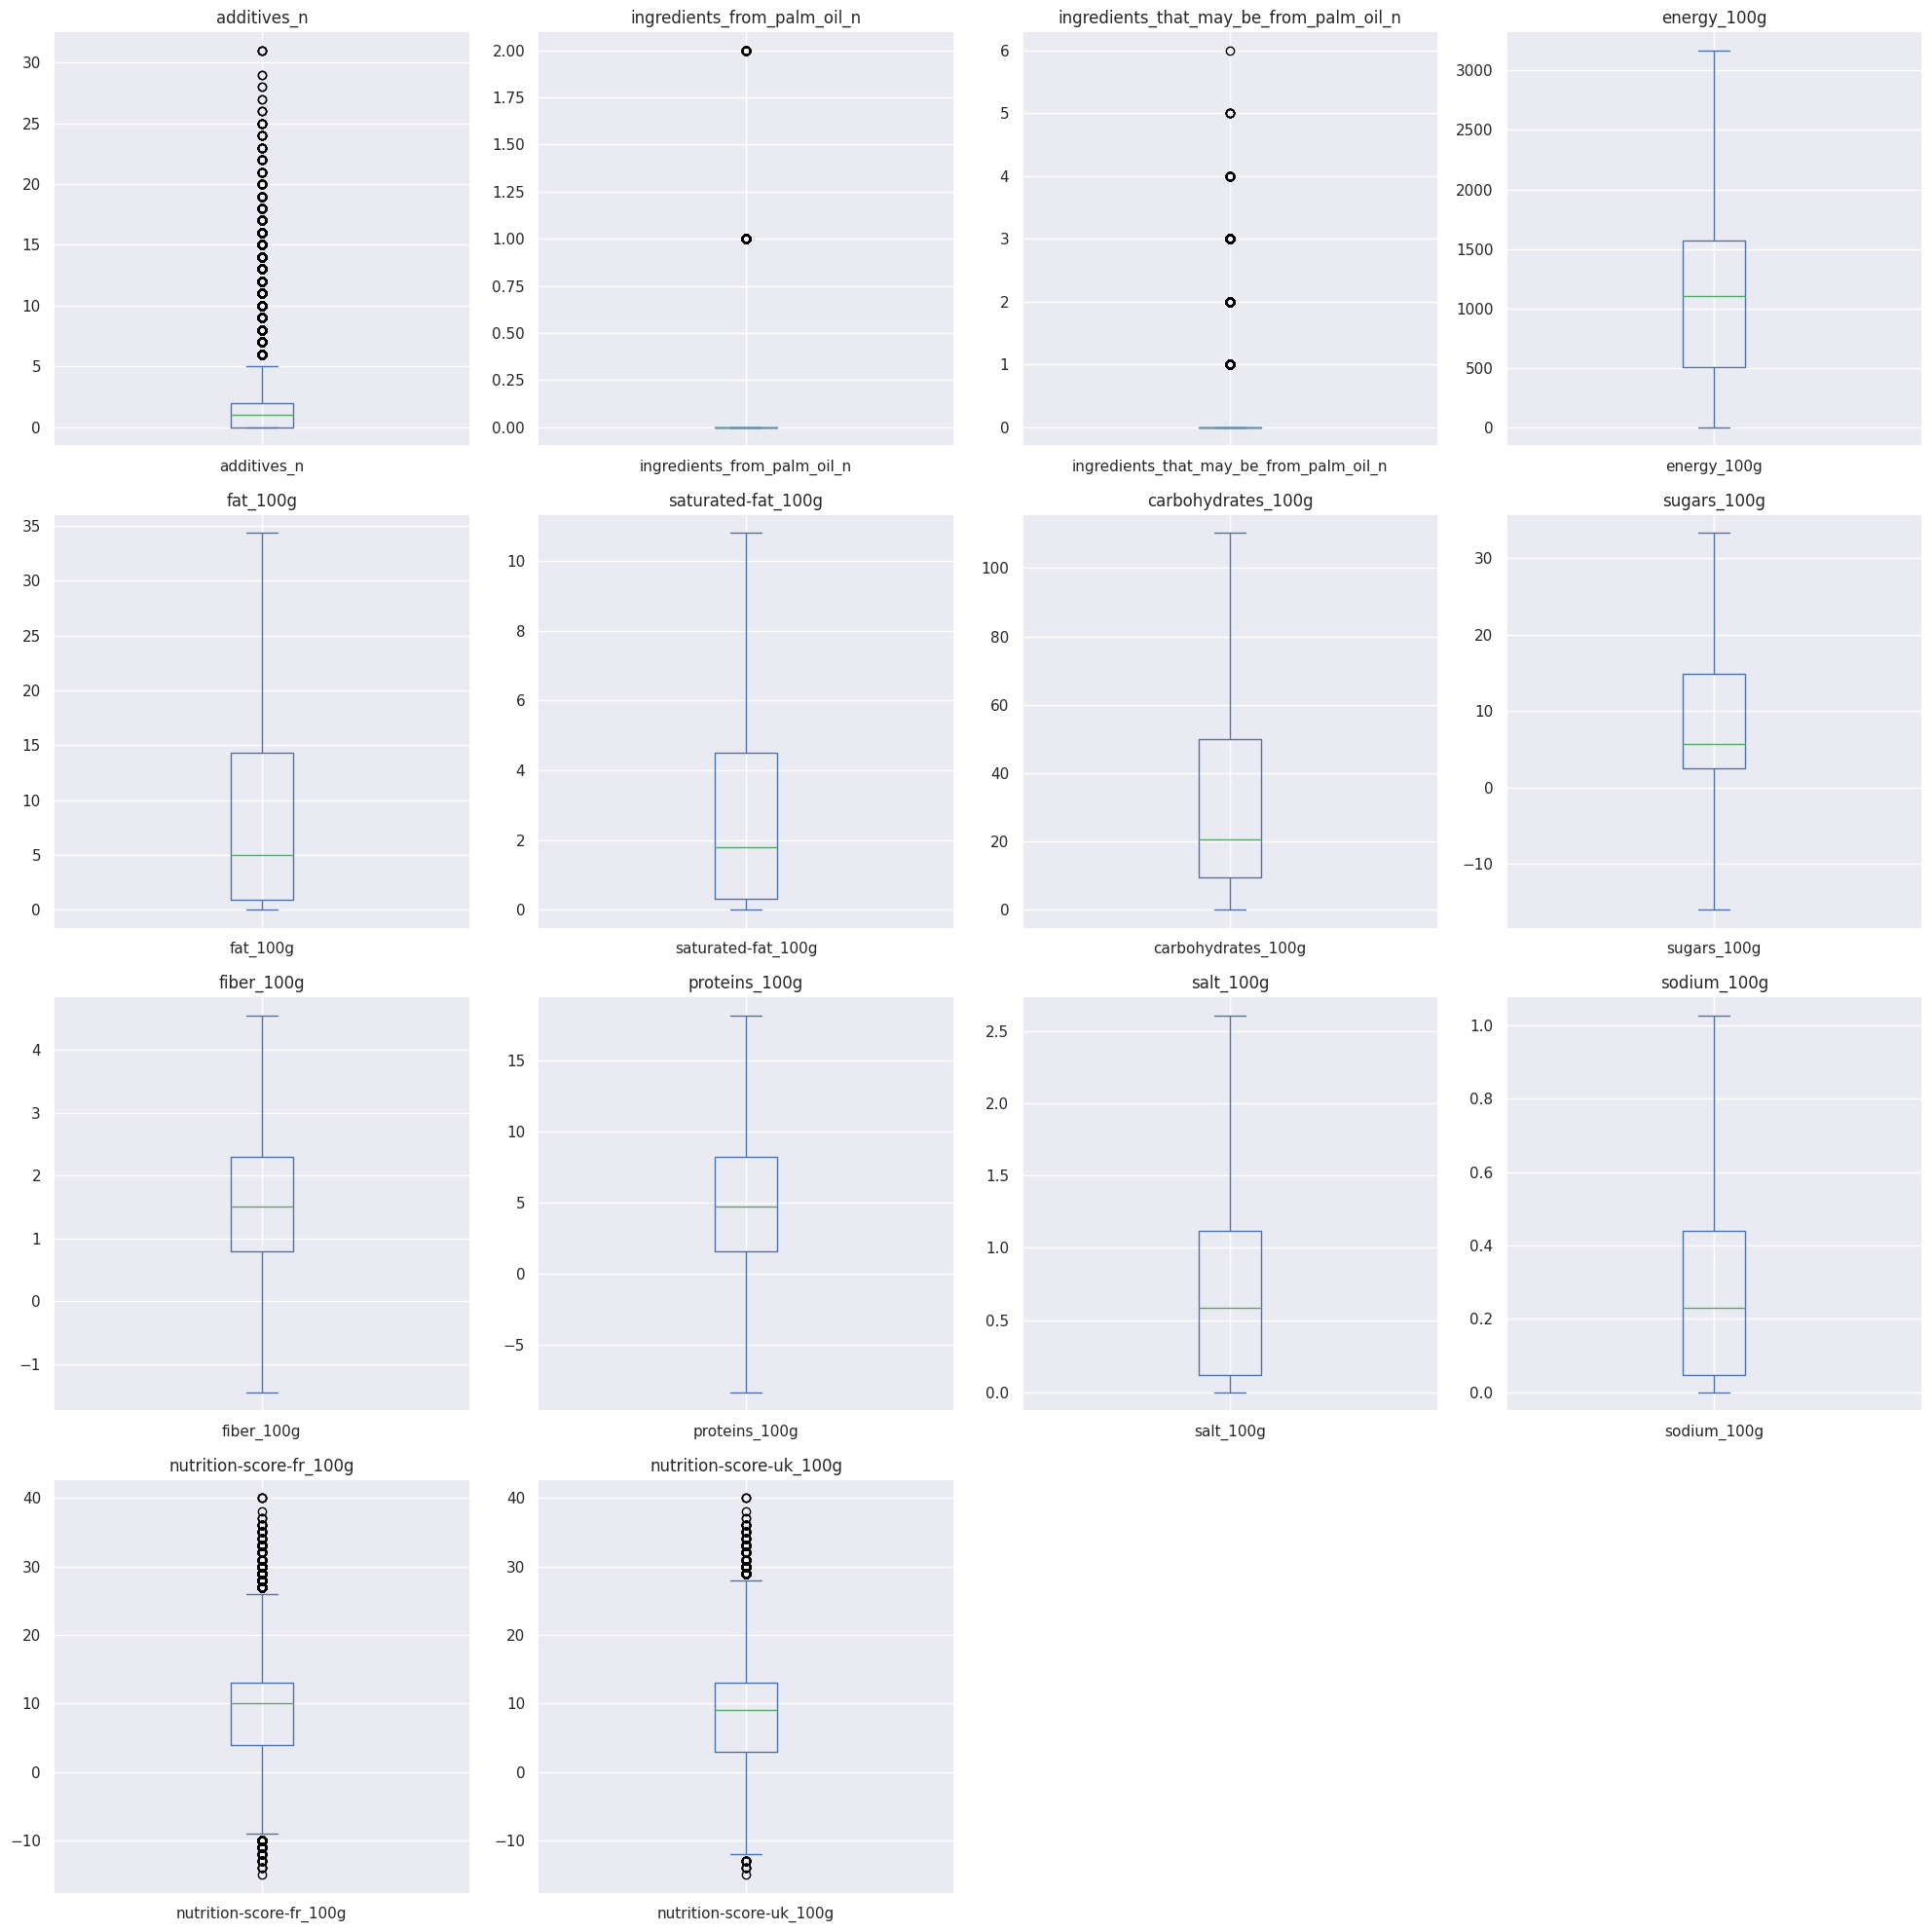

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn's aesthetic parameters to match Matplotlib's
sns.set()

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate number of rows needed for subplots
n = len(numeric_cols)
n_rows = n//4 if n%4 == 0 else n//4 + 1

fig, axes = plt.subplots(n_rows, 4, figsize=(20, n_rows*5))

for ax, col in zip(axes.flatten(), numeric_cols):
    df[col].plot(kind='box', ax=ax)
    ax.set_title(col)

# Remove empty subplots
if n % 4:
    for i in range(n, n_rows*4):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


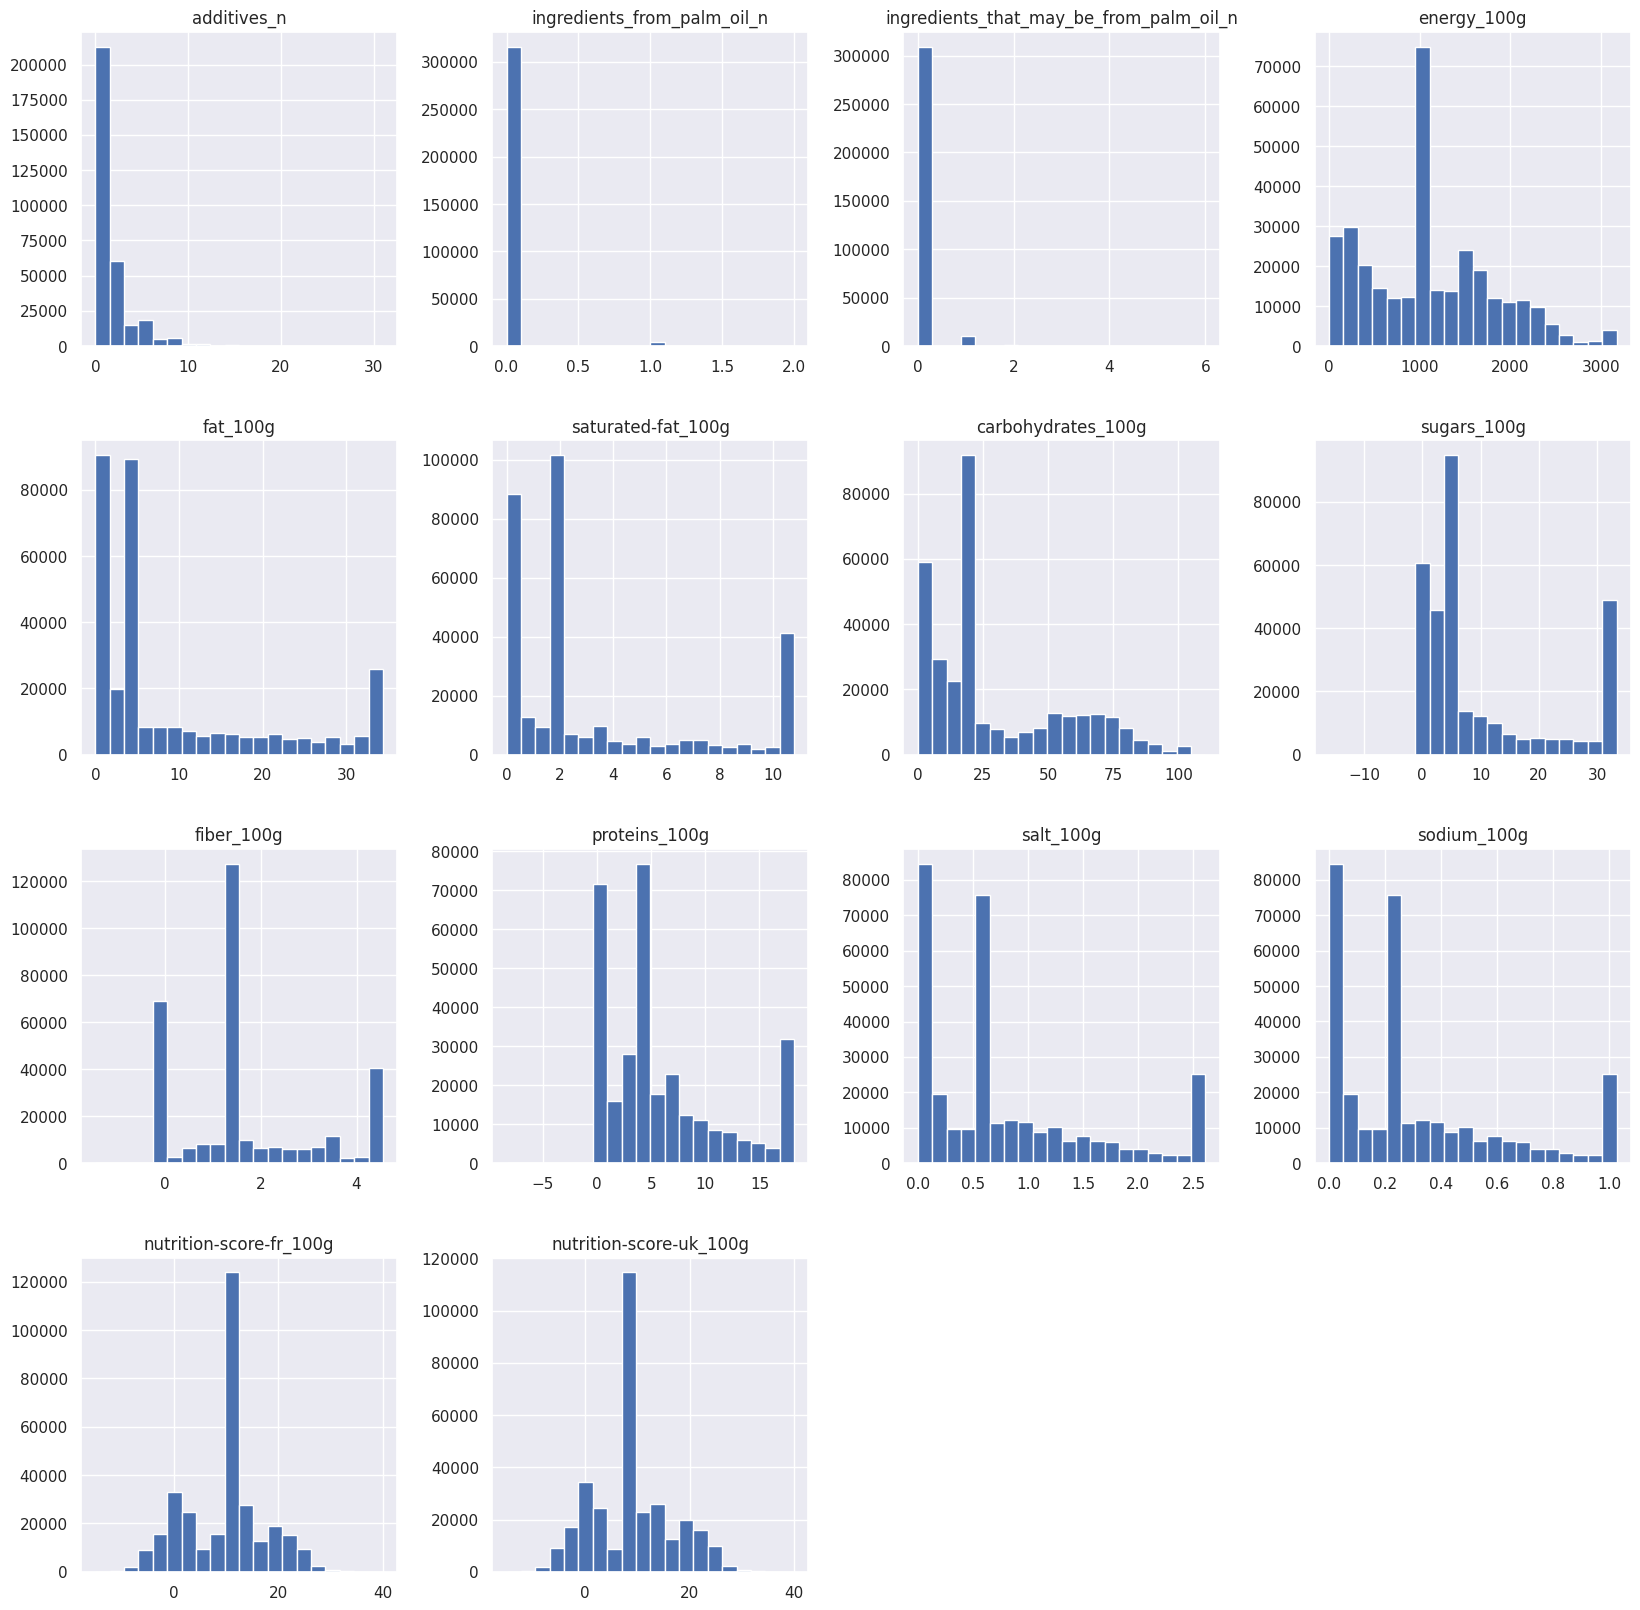

In [4]:
hist_plots = df.hist(figsize=(20,20), bins=20)

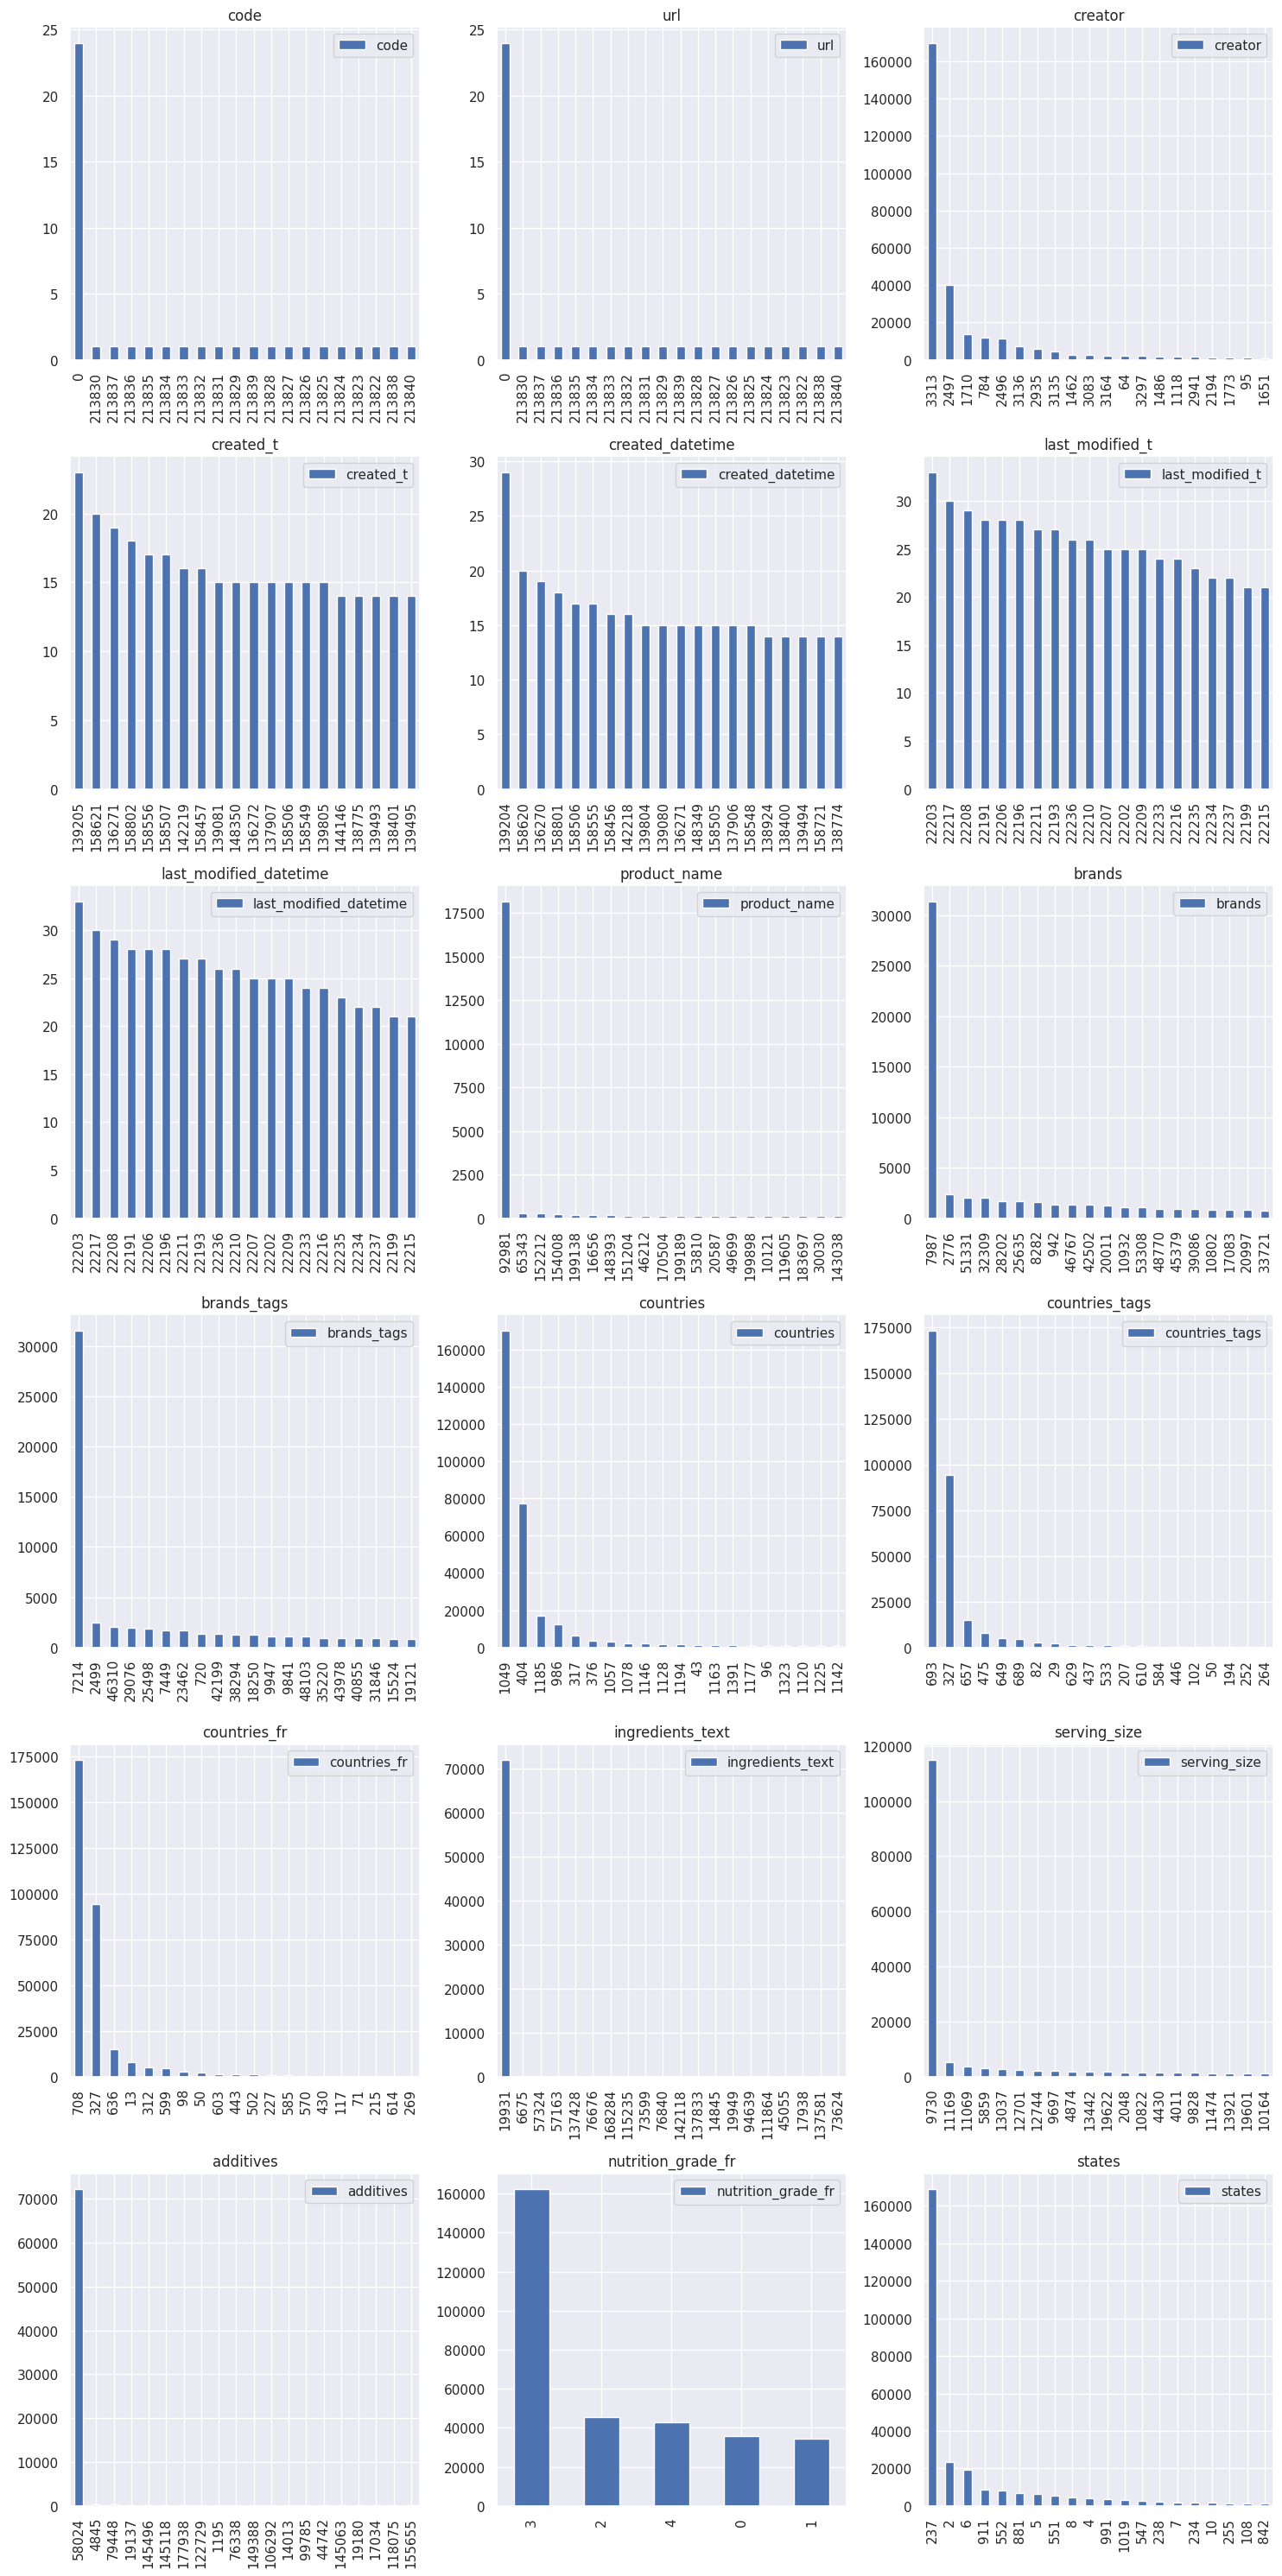

In [5]:
from sklearn.preprocessing import LabelEncoder

encoded_df = df.select_dtypes(include='object').apply(LabelEncoder().fit_transform)

object_cols = encoded_df.columns.to_list()

# Calculate number of rows needed for subplots
n = len(object_cols)
n_rows = n//3 if n%4 == 0 else n//3 + 1

fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows*5))

for ax, col in zip(axes.flatten(), object_cols):
    encoded_df[col].value_counts().to_frame().iloc[0:20].plot(kind='bar', ax=ax)
    ax.set_title(col)

# Remove empty subplots
if n % 4:
    for i in range(n, n_rows*4):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [8]:
df[df.select_dtypes(include='object').columns.to_list()] = df.select_dtypes(include='object').apply(LabelEncoder().fit_transform)

In [9]:
df.select_dtypes(include=[np.number]).columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'brands',
 'brands_tags',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'serving_size',
 'additives_n',
 'additives',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'states',
 'states_tags',
 'states_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

In [48]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate number of rows needed for subplots
n = len(numeric_cols)
n_rows = n*(n-1)//2  # Number of unique pairs
n_cols = 4  # Number of plots per row

# Prepare the subplot grid
n_full_rows = n_rows//n_cols
n_extra_plots = n_rows%n_cols
fig, axes = plt.subplots(n_full_rows + (1 if n_extra_plots else 0), n_cols, figsize=(20, 5*n_rows//n_cols))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over pairs of columns and create scatter plots
i = 0
for col1_idx in range(n):
    for col2_idx in range(col1_idx + 1, n):
        ax = axes[i]
        df.plot(kind='scatter', x=numeric_cols[col1_idx], y=numeric_cols[col2_idx], ax=ax)
        ax.set_title(f'{numeric_cols[col1_idx]} vs {numeric_cols[col2_idx]}')
        i += 1

# Remove empty subplots
for j in range(i, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

: 

: 

In [7]:
df[numeric_cols].corr()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
additives_n,1.000000,0.129320,0.296923,-0.003902,-0.036403,0.027091,0.181850,0.183212,-0.100091,-0.076442,0.092950,0.092948,0.133285,0.135979
ingredients_from_palm_oil_n,0.129320,1.000000,0.191953,0.094441,0.093628,0.124210,0.082750,0.089688,0.039841,0.006539,-0.007804,-0.007761,0.100503,0.105604
ingredients_that_may_be_from_palm_oil_n,0.296923,0.191953,1.000000,0.020870,0.045499,0.071530,0.030135,0.042903,-0.009592,-0.025333,0.015848,0.015850,0.046392,0.050290
energy_100g,-0.003902,0.094441,0.020870,1.000000,0.723345,0.603124,0.487518,0.331109,0.316617,0.328488,0.075529,0.075460,0.557840,0.584672
fat_100g,-0.036403,0.093628,0.045499,0.723345,1.000000,0.785100,0.029638,0.095304,0.179378,0.372121,0.203331,0.203299,0.551560,0.584650
saturated-fat_100g,0.027091,0.124210,0.071530,0.603124,0.785100,1.000000,0.017215,0.203852,0.015620,0.294717,0.133706,0.133649,0.702748,0.733928
carbohydrates_100g,0.181850,0.082750,0.030135,0.487518,0.029638,0.017215,1.000000,0.618434,0.330996,-0.026804,-0.091679,-0.091762,0.211828,0.221226
sugars_100g,0.183212,0.089688,0.042903,0.331109,0.095304,0.203852,0.618434,1.000000,0.080983,-0.226298,-0.235692,-0.235778,0.452811,0.449776
fiber_100g,-0.100091,0.039841,-0.009592,0.316617,0.179378,0.015620,0.330996,0.080983,1.000000,0.208089,-0.028219,-0.028286,-0.170860,-0.156161
proteins_100g,-0.076442,0.006539,-0.025333,0.328488,0.372121,0.294717,-0.026804,-0.226298,0.208089,1.000000,0.315799,0.315773,0.066066,0.104315


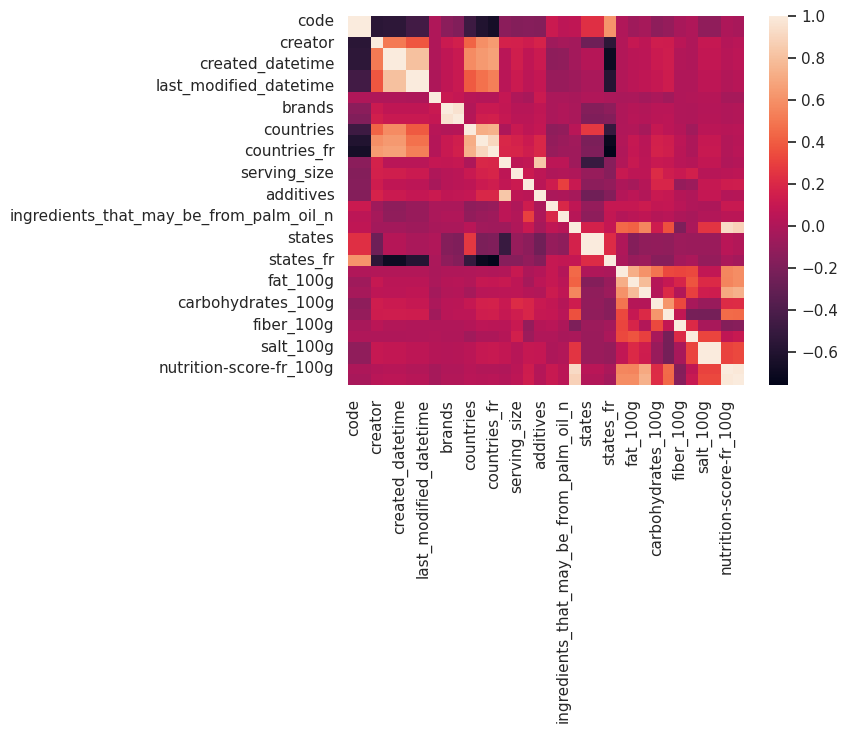

In [11]:
correlation_heatmap = sns.heatmap(df.corr())

# Notes 

- quantative ~ quantative
- quantative ~ qualataive
    - eta_squared, linear regression
- qualtative ~ qualitataive


PCA
- Statistics
- Visualisations

Explained variance ratio: [0.22278822 0.1425256  0.091615   0.07100642 0.05498548 0.05245322]


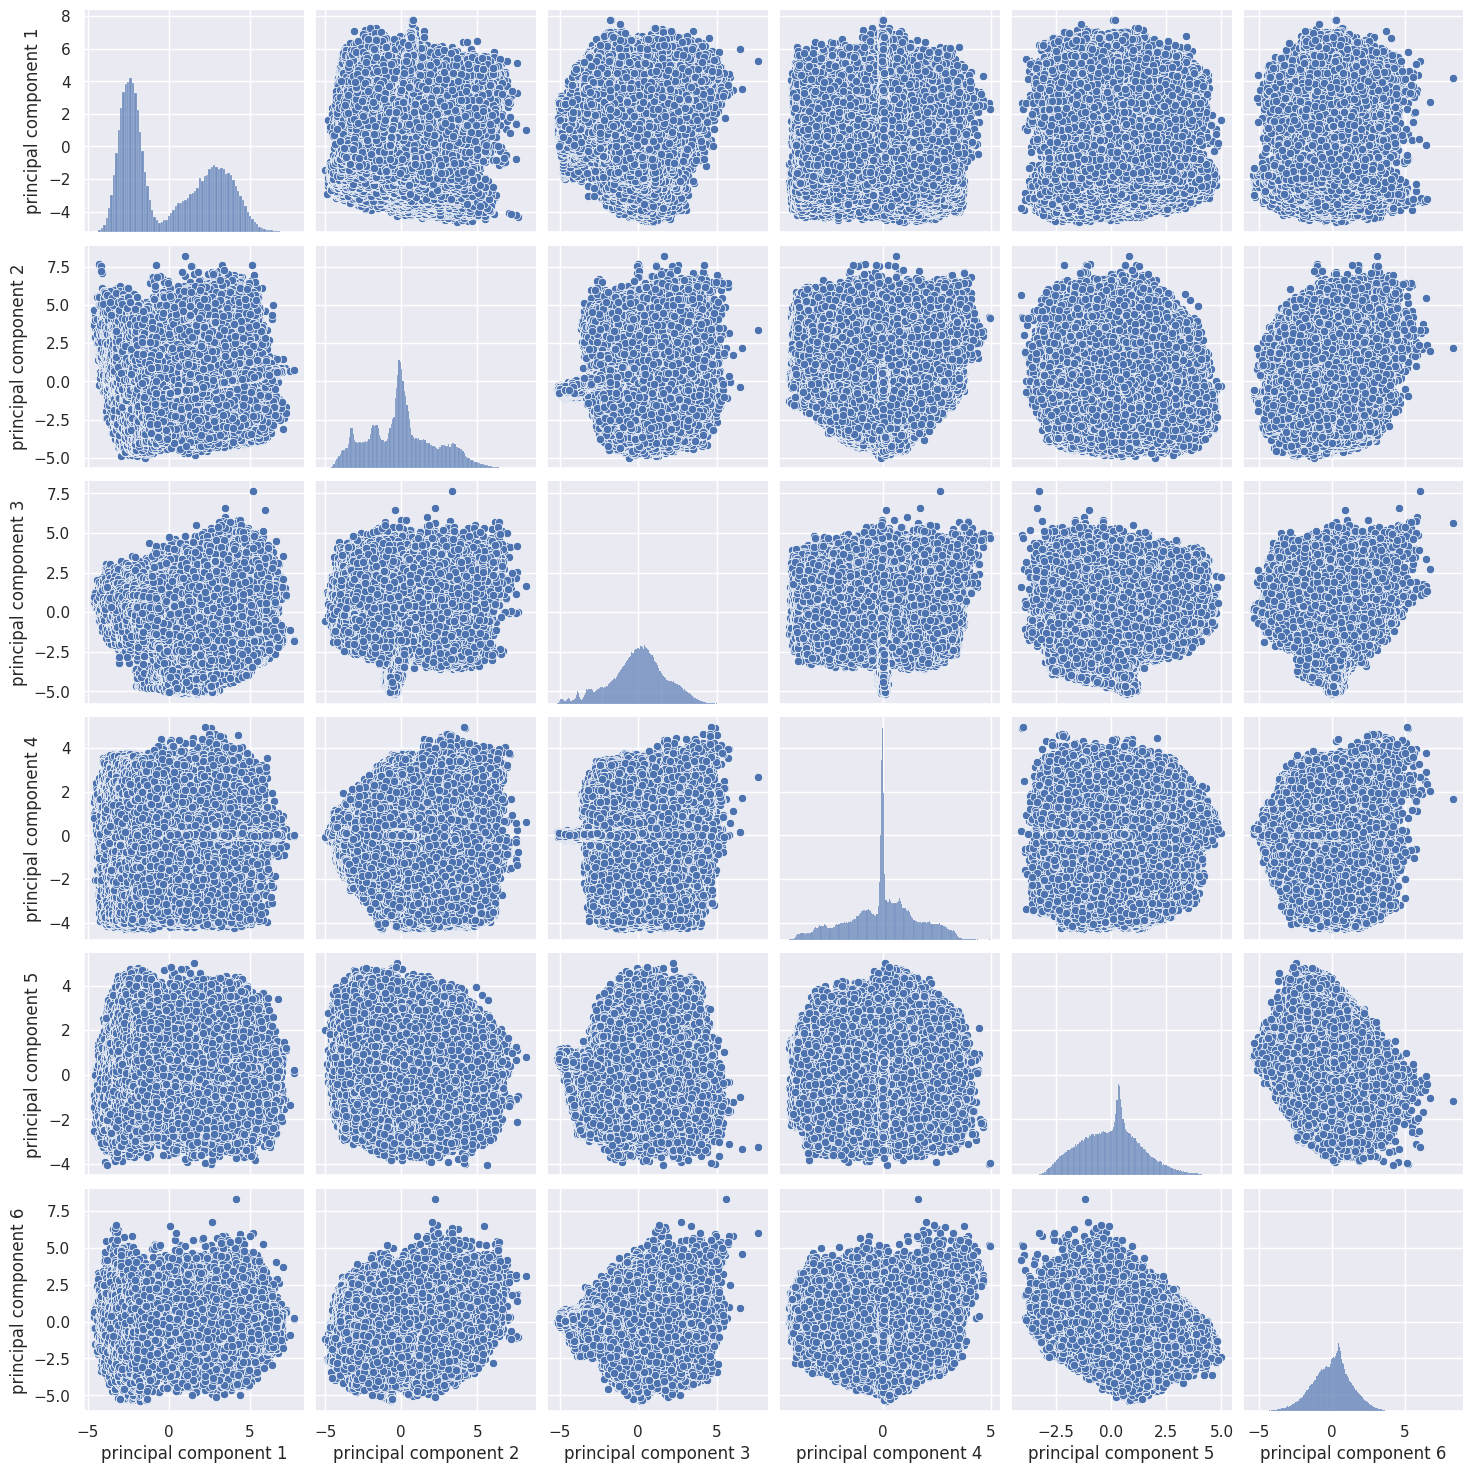

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming that df is your DataFrame and that it only contains numeric columns. If it has non-numeric columns, you should exclude them from this process.
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# 1. Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# 2. Apply PCA
# 2. Apply PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(scaled_df)

# 3. Convert the results back to a dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6'])
# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

sns.pairplot(principalDf)

In [16]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression

X = df.iloc[:,:-2]
Y = df.iloc[:,-1]


model = LinearRegression()
selector = RFE(model, step=1)

selector = selector.fit(X, Y)

X_transformed = selector.transform(X)

model.fit(X_transformed, Y)


LinearRegression()

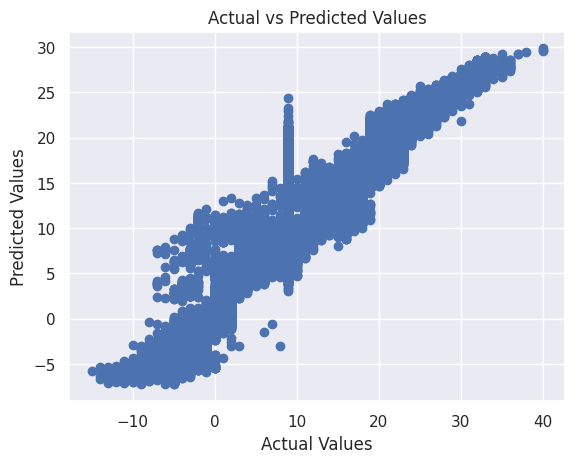

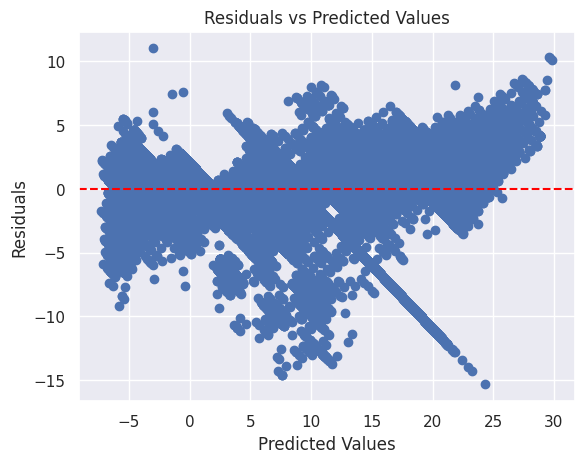

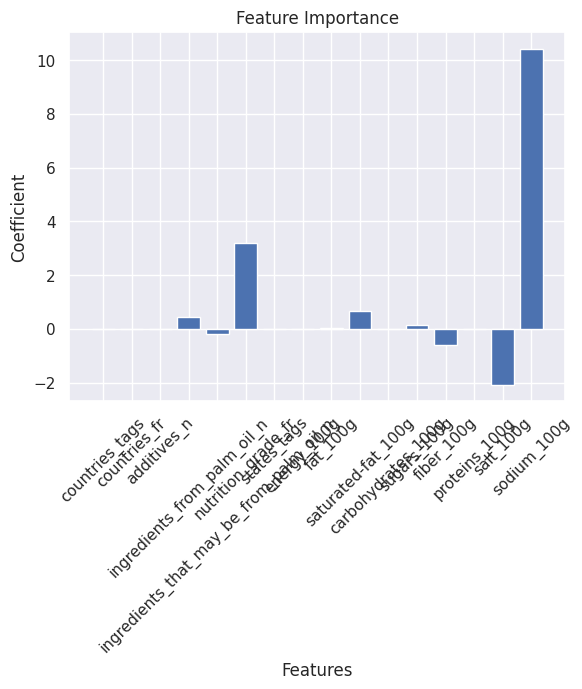

In [17]:
y_pred = model.predict(X_transformed)

import matplotlib.pyplot as plt

plt.scatter(Y, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

residuals = Y - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


selected_features = X.columns[selector.support_]
feature_importance = model.coef_

plt.bar(selected_features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()


In [38]:
X[X.columns[selector.support_].to_list()]

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,saturated-fat_100g,fiber_100g,salt_100g,sodium_100g
0,0.0,0.0,1.79,1.50,0.58166,0.229
1,0.0,0.0,10.80,3.60,0.00000,0.000
2,0.0,0.0,0.00,4.55,0.63500,0.250
3,0.0,0.0,5.36,4.55,1.22428,0.482
4,0.0,0.0,1.79,4.55,0.58166,0.229
...,...,...,...,...,...,...
320767,0.0,0.0,1.79,1.50,0.58166,0.229
320768,0.0,0.0,0.00,0.00,0.00000,0.000
320769,0.0,0.0,1.79,1.50,0.58166,0.229
320770,0.0,0.0,1.79,1.50,0.58166,0.229


In [18]:
import statsmodels.api as sm

X = X[X.columns[selector.support_].to_list()]
X_with_constant = sm.add_constant(X)
model = sm.OLS(df[numeric_cols[-1]], X_with_constant).fit()

print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     nutrition-score-uk_100g   R-squared:                       0.927
Model:                                 OLS   Adj. R-squared:                  0.927
Method:                      Least Squares   F-statistic:                 2.529e+05
Date:                     Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                             20:41:31   Log-Likelihood:            -6.8806e+05
No. Observations:                   320772   AIC:                         1.376e+06
Df Residuals:                       320755   BIC:                         1.376e+06
Df Model:                               16                                         
Covariance Type:                 nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [12]:
import statsmodels.api as sm

X = df[numeric_cols[:-2]]
X_with_constant = sm.add_constant(X)
model = sm.OLS(df[numeric_cols[-2]], X_with_constant).fit()

print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     nutrition-score-fr_100g   R-squared:                       0.776
Model:                                 OLS   Adj. R-squared:                  0.776
Method:                      Least Squares   F-statistic:                 9.250e+04
Date:                     Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                             05:44:07   Log-Likelihood:            -8.6295e+05
No. Observations:                   320772   AIC:                         1.726e+06
Df Residuals:                       320759   BIC:                         1.726e+06
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

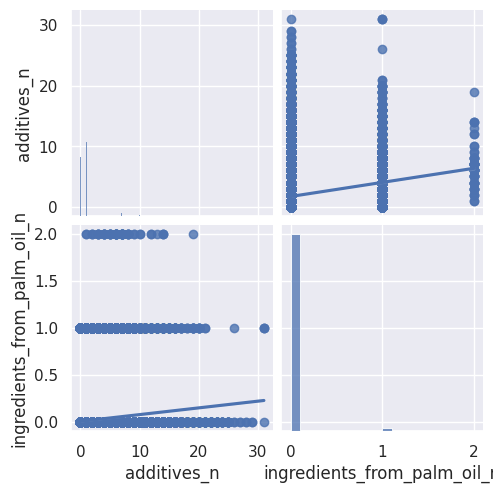

In [13]:
#sns.pairplot(df[numeric_cols[0:2]], kind="reg")

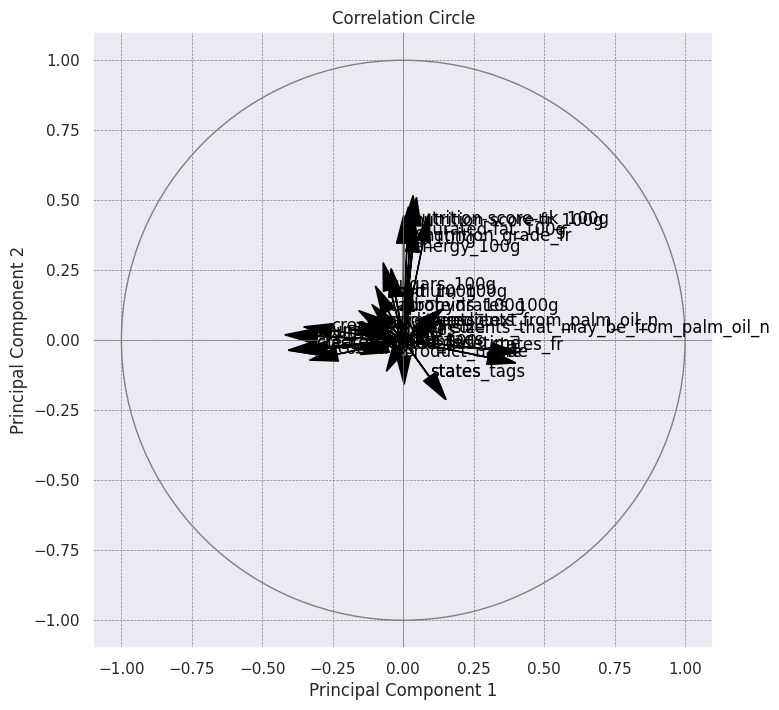

In [20]:
correlation_matrix = df.corr()
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(correlation_matrix)

loadings = pca.components_.T

fig, ax = plt.subplots(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, color='gray', fill=False)
ax.add_artist(circle)

for i, (loading_1, loading_2) in enumerate(loadings):
    ax.arrow(0, 0, loading_1, loading_2, head_width=0.05, head_length=0.1, fc='black', ec='black')
    plt.text(loading_1, loading_2, df.columns[i], color='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Correlation Circle')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


In [15]:
from scipy.stats import chi2_contingency



for col1 in df.select_dtypes(include='object').columns.to_list():
    for col2 in list(reversed(df.select_dtypes(include='object').columns.to_list())):

        # Cross-tabulation
        cross_tab = pd.crosstab(df[col1], df[col2])
        #print(cross_tab)

        # Chi-Square Test
        chi2, p, dof, expected = chi2_contingency(cross_tab)
        print('Chi2:', chi2, 'p-value:', p)

: 

: 

In [ ]:
from scipy.stats import chi2_contingency

# Sample DataFrame
df = pd.DataFrame({'Gender': ['M', 'F', 'M', 'F'], 'Preference': ['A', 'A', 'B', 'B']})

# Cross-tabulation
cross_tab = pd.crosstab(df['Gender'], df['Preference'])
print(cross_tab)

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(cross_tab)
print('Chi2:', chi2, 'p-value:', p)